Installing and Importing Dependencies

In [30]:
!pip install --quiet qiskit qiskit-aer

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import XGate, ZGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

The Teleportation Circuit

Measurement outcomes: {'1 1': 241, '0 1': 248, '0 0': 270, '1 0': 265}


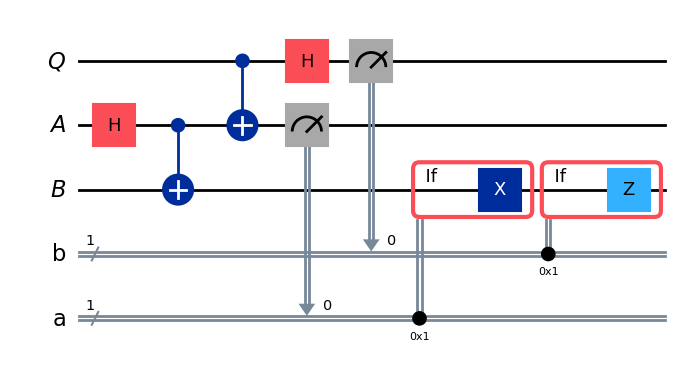

In [36]:
# ─── Registers ───────────────────────────────────────────────────────────────
q = QuantumRegister(1, "Q")   # qubit to teleport
a = QuantumRegister(1, "A")   # Alice's entangled qubit
b = QuantumRegister(1, "B")   # Bob's entangled qubit
c0 = ClassicalRegister(1, "b")  # result of Q
c1 = ClassicalRegister(1, "a")  # result of A

qc = QuantumCircuit(q, a, b, c0, c1)

# ─── Create Bell pair ────────────────────────────────────────────────────────
qc.h(a)
qc.cx(a, b)

# ─── Entangle qubit to teleport ──────────────────────────────────────────────
qc.cx(q, a)
qc.h(q)

# ─── Measure Q and A ─────────────────────────────────────────────────────────
qc.measure(q, c0)
qc.measure(a, c1)

# ─── Apply corrections using new if_test syntax ──────────────────────────────
with qc.if_test((c1, 1)):
    qc.x(b)
with qc.if_test((c0, 1)):
    qc.z(b)

# ─── Simulate ────────────────────────────────────────────────────────────────
sim = AerSimulator()
result = sim.run(qc, shots=1024).result()
counts = result.get_counts()

# ─── Display ─────────────────────────────────────────────────────────────────
print("Measurement outcomes:", counts)
display(qc.draw(output="mpl"))
plt.show()

plot_histogram(counts)
plt.show()
